# Potential Well
## Computational Nuclear Physics
### Project 1

### Papadopoulou Martha

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import simpson

### Define Constant Values

In [2]:
hbar_c = 197.327 # MeV * fermi
mu_c2 = 939.57 # MeV
abs_E = 2.22 # MeV

# Visualize Problem

### Define System Equations' Functions

In [3]:
def eq1(ksi):
    v = -ksi / np.tan(ksi) # cot(ksi) = 1/tan(ksi)
    return v

def eq2(V0_L2, ksi):
    v2 = (2*mu_c2*V0_L2)/(hbar_c)**2 - ksi**2
    v2 = np.where(v2 >= 0, v2, np.nan) # to avoid warning
    v = np.sqrt(v2)
    return v

### Plot System Equations

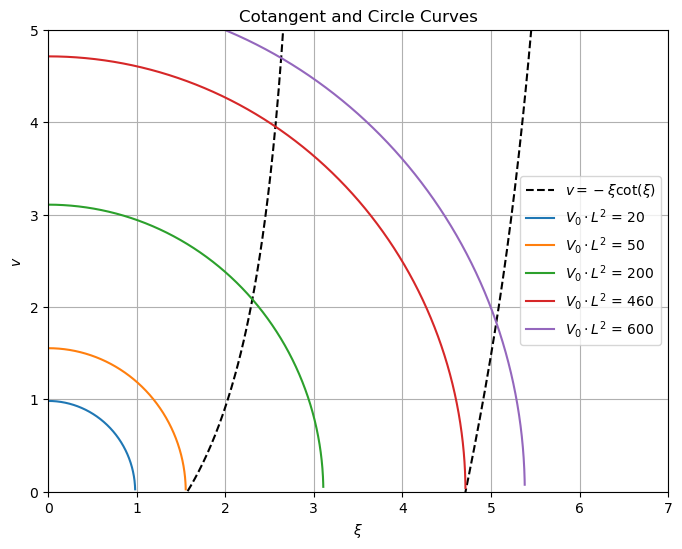

In [4]:
# Example values of V_0 * L^2
V0_L2_values = [20, 50, 200, 460, 600]

# Plot
plt.figure(figsize=(8, 6))

# Cot curves
for i in range(1, 3):  # 2 branches of cot between (0, π), (π, 2π)
    ksi_branch = np.linspace((i - 1) * np.pi + 0.05, i * np.pi - 0.05, 200) # 0.05 to avoid warning
    plt.plot(ksi_branch, eq1(ksi_branch), 'k--', label=r'$v = -\xi \cot(\xi)$' if i == 1 else "")

# Circles for each V_0 L^2
ksi_values = np.linspace(0, 10, 10000) 
for i, V0_L2 in enumerate(V0_L2_values):
    plt.plot(ksi_values, eq2(V0_L2, ksi_values), label=rf'$V_0 \cdot L^2$ = {V0_L2}')

# Labels
plt.xlabel(r'$\xi$')
plt.ylabel(r'$v$')
plt.title('Cotangent and Circle Curves')
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.legend()
plt.grid()
plt.show()

# Find Valid (V_0, L) Pairs for a Solution

### Set Boundaries

In [5]:
# Lower boundary
V0_L2_min = np.pi**2 * hbar_c**2 / (8*mu_c2)

# Upper boundary
V0_L2_max = 9*np.pi**2 * hbar_c**2 / (8*mu_c2)

print(f"Lower boundary of V\u2080 L\u00b2 = {V0_L2_min:.2f} and upper boundary of V\u2080 L\u00b2 = {V0_L2_max:.2f}")

Lower boundary of V₀ L² = 51.13 and upper boundary of V₀ L² = 460.15


### Generate (V, L) Pairs within Boundaries

In [6]:
# Generate 100 V_0 * L^2 values within boundaries
bound_range = np.linspace(V0_L2_min, V0_L2_max, 100)

# Keep L value fixed within a 1 - 3 fermi range
L_range = np.arange(1, 3.1, 0.1)

# Initialize (V, L) pair matrix
VL_matrix = []

# Calculate V_0 value for every L value
for L in L_range:
    for a in bound_range:
        V = a / L**2
        VL_matrix.append([V, L])

# Create pandas data frame for xonvenience
df = pd.DataFrame(VL_matrix, columns=['V_0', 'L'])

### Filter (V_0, L) Pairs with V_0 values in the same Order of Magnitude as E

In [7]:
# Keep values 1 <= V_0 <= 10
df_filtered = df[(df['V_0'] >= 1) & (df['V_0'] <= 10)]
print(df_filtered)

           V_0    L
1300  9.664913  2.3
1400  8.876283  2.4
1401  9.593559  2.4
1500  8.180383  2.5
1501  8.841424  2.5
1502  9.502465  2.5
1600  7.563224  2.6
1601  8.174393  2.6
1602  8.785563  2.6
1603  9.396733  2.6
1700  7.013360  2.7
1701  7.580096  2.7
1702  8.146832  2.7
1703  8.713568  2.7
1704  9.280304  2.7
1705  9.847040  2.7
1800  6.521351  2.8
1801  7.048329  2.8
1802  7.575307  2.8
1803  8.102285  2.8
1804  8.629263  2.8
1805  9.156240  2.8
1806  9.683218  2.8
1900  6.079357  2.9
1901  6.570618  2.9
1902  7.061879  2.9
1903  7.553141  2.9
1904  8.044402  2.9
1905  8.535663  2.9
1906  9.026924  2.9
1907  9.518185  2.9
2000  5.680821  3.0
2001  6.139878  3.0
2002  6.598934  3.0
2003  7.057990  3.0
2004  7.517046  3.0
2005  7.976103  3.0
2006  8.435159  3.0
2007  8.894215  3.0
2008  9.353272  3.0
2009  9.812328  3.0


### Calculate ksi_1 for Filtered Pairs

In [8]:
def cal_ksi_1(V0, L):
    ksi_1 = np.sqrt((2*mu_c2*(V0 - abs_E))/(hbar_c)**2)*L
    return ksi_1

In [9]:
# Calculate and add to data frame the intersection point of the curves
df_filtered = df_filtered.copy() # to avoid warning
df_filtered.loc[:,'ksi_1'] = cal_ksi_1(df_filtered['V_0'], df_filtered['L'])
print(df_filtered)

           V_0    L     ksi_1
1300  9.664913  2.3  1.378640
1400  8.876283  2.4  1.360255
1401  9.593559  2.4  1.431670
1500  8.180383  2.5  1.340819
1501  8.841424  2.5  1.413217
1502  9.502465  2.5  1.482082
1600  7.563224  2.6  1.320286
1601  8.174393  2.6  1.393751
1602  8.785563  2.6  1.463533
1603  9.396733  2.6  1.530135
1700  7.013360  2.7  1.298604
1701  7.580096  2.7  1.373229
1702  8.146832  2.7  1.444003
1703  8.713568  2.7  1.511466
1704  9.280304  2.7  1.576045
1705  9.847040  2.7  1.638079
1800  6.521351  2.8  1.275715
1801  7.048329  2.8  1.351604
1802  7.575307  2.8  1.423453
1803  8.102285  2.8  1.491846
1804  8.629263  2.8  1.557238
1805  9.156240  2.8  1.619993
1806  9.683218  2.8  1.680406
1900  6.079357  2.9  1.251551
1901  6.570618  2.9  1.328821
1902  7.061879  2.9  1.401839
1903  7.553141  2.9  1.471237
1904  8.044402  2.9  1.537506
1905  8.535663  2.9  1.601034
1906  9.026924  2.9  1.662136
1907  9.518185  2.9  1.721070
2000  5.680821  3.0  1.226038
2001  6.13

### Calculate |E| for Validation

In [10]:
def cal_E(V0, L, ksi_1):
    E = V0 - ((hbar_c**2 * ksi_1**2)/(2*mu_c2*L**2))
    return E

In [11]:
# Calculate the binding energy and add it to data frame
df_filtered = df_filtered.copy() # to avoid warning
df_filtered.loc[:,'|E|'] = cal_E(df_filtered['V_0'], df_filtered['L'], df_filtered['ksi_1'])
print(df_filtered)

           V_0    L     ksi_1   |E|
1300  9.664913  2.3  1.378640  2.22
1400  8.876283  2.4  1.360255  2.22
1401  9.593559  2.4  1.431670  2.22
1500  8.180383  2.5  1.340819  2.22
1501  8.841424  2.5  1.413217  2.22
1502  9.502465  2.5  1.482082  2.22
1600  7.563224  2.6  1.320286  2.22
1601  8.174393  2.6  1.393751  2.22
1602  8.785563  2.6  1.463533  2.22
1603  9.396733  2.6  1.530135  2.22
1700  7.013360  2.7  1.298604  2.22
1701  7.580096  2.7  1.373229  2.22
1702  8.146832  2.7  1.444003  2.22
1703  8.713568  2.7  1.511466  2.22
1704  9.280304  2.7  1.576045  2.22
1705  9.847040  2.7  1.638079  2.22
1800  6.521351  2.8  1.275715  2.22
1801  7.048329  2.8  1.351604  2.22
1802  7.575307  2.8  1.423453  2.22
1803  8.102285  2.8  1.491846  2.22
1804  8.629263  2.8  1.557238  2.22
1805  9.156240  2.8  1.619993  2.22
1806  9.683218  2.8  1.680406  2.22
1900  6.079357  2.9  1.251551  2.22
1901  6.570618  2.9  1.328821  2.22
1902  7.061879  2.9  1.401839  2.22
1903  7.553141  2.9  1.47123

### Scatter plot (V_0, L) Filtered Pairs

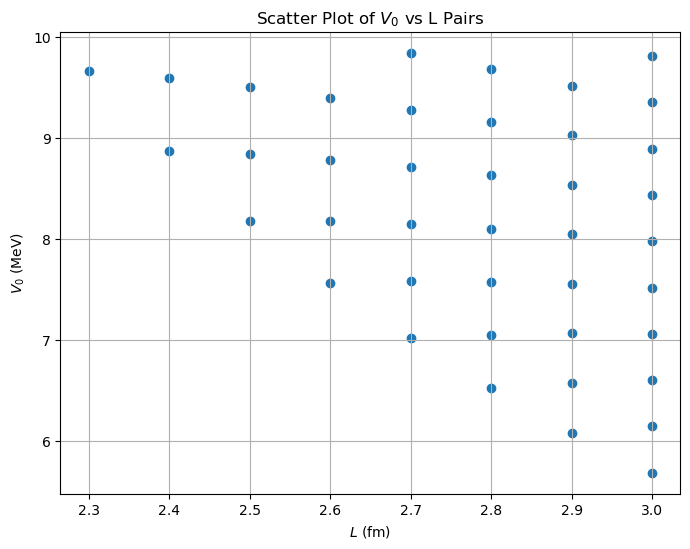

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['L'], df_filtered['V_0'])
plt.xlabel(r'$L$ (fm)')
plt.ylabel(r'$V_0$ (MeV)')
plt.title(r'Scatter Plot of $V_0$ vs L Pairs')
plt.grid(True)
plt.show()

# Calculate A and B coefficients and Plot wavefunction

### Calculate k and gamma

In [13]:
def cal_k(V0, E):
    k = np.sqrt((2*mu_c2*(V0-E))/hbar_c**2)
    return k

def cal_gamma(E):
    gamma = np.sqrt((2*mu_c2*E)/hbar_c**2)
    return gamma

### Calculate A and B Coefficients to Normalize the Wavefunction

In [14]:
def solve_AB(k, gamma, L):

    # Set number of points for integration
    n = 1000

    # Set lower, middle and upper limit for integration
    low_lim = 0
    mid_lim = L 
    up_lim = 1000

    # Calculate first integral with Simpson's Rule
    r1 = np.linspace(low_lim, mid_lim, n)
    integrand1 = np.sin(k*r1)**2
    integral1 = simpson(integrand1, x=r1)

    # Calculate second integral with Simpson's Rule
    r2 = np.linspace(mid_lim, up_lim, n)
    integrand2 = np.sin(k*L)**2 * np.exp(-2*gamma*(r2-L))
    integral2 = simpson(integrand2, x=r2)

    # Calculate A and B coefficients
    A = 1 / np.sqrt(integral1 + integral2)
    B = A * np.sin(k*L) * np.exp(gamma*L)

    # Normalize wavefunction for validation
    norm_integrand_1 = (A * np.sin(k*r1))**2
    norm_integral_1 = simpson(norm_integrand_1, x=r1)

    norm_integrand_2 = (B * np.exp(-gamma*r2))**2
    norm_integral_2 = simpson(norm_integrand_2, x=r2)

    I = norm_integral_1 + norm_integral_2
    
    return A, B, I

In [15]:
# Compute A and B values for each row
for i, row in df_filtered.iterrows():

    # Calculate k and gamma
    k = cal_k(row['V_0'], row['|E|'])
    gamma = cal_gamma(row['|E|'])
    L = row['L']

    # Calculate A, B, I and add them to data frame
    A, B, I = solve_AB(k, gamma, L)
    df_filtered.loc[i, 'A'] = A
    df_filtered.loc[i, 'B'] = B
    df_filtered.loc[i, 'I'] = I

print(df_filtered)

           V_0    L     ksi_1   |E|         A         B    I
1300  9.664913  2.3  1.378640  2.22  0.636684  1.326803  1.0
1400  8.876283  2.4  1.360255  2.22  0.634750  1.361665  1.0
1401  9.593559  2.4  1.431670  2.22  0.622028  1.351321  1.0
1500  8.180383  2.5  1.340819  2.22  0.633385  1.397852  1.0
1501  8.841424  2.5  1.413217  2.22  0.619661  1.387141  1.0
1502  9.502465  2.5  1.482082  2.22  0.609415  1.375887  1.0
1600  7.563224  2.6  1.320286  2.22  0.632632  1.435407  1.0
1601  8.174393  2.6  1.393751  2.22  0.617813  1.424331  1.0
1602  8.785563  2.6  1.463533  2.22  0.606677  1.412702  1.0
1603  9.396733  2.6  1.530135  2.22  0.598469  1.400485  1.0
1700  7.013360  2.7  1.298604  2.22  0.632540  1.474377  1.0
1701  7.580096  2.7  1.373229  2.22  0.616519  1.462938  1.0
1702  8.146832  2.7  1.444003  2.22  0.604418  1.450936  1.0
1703  8.713568  2.7  1.511466  2.22  0.595407  1.438336  1.0
1704  9.280304  2.7  1.576045  2.22  0.588899  1.425101  1.0
1705  9.847040  2.7  1.6

### Plot Wavefunctions for each Filtered (V_0, L) Pair, Separated by L Value

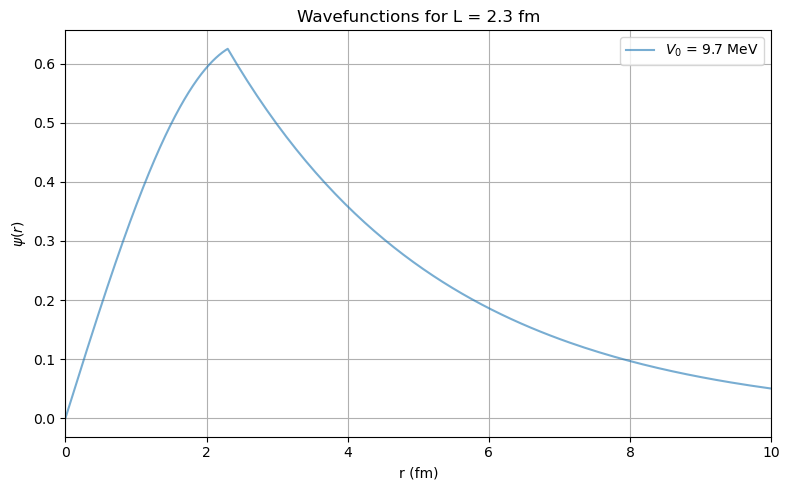

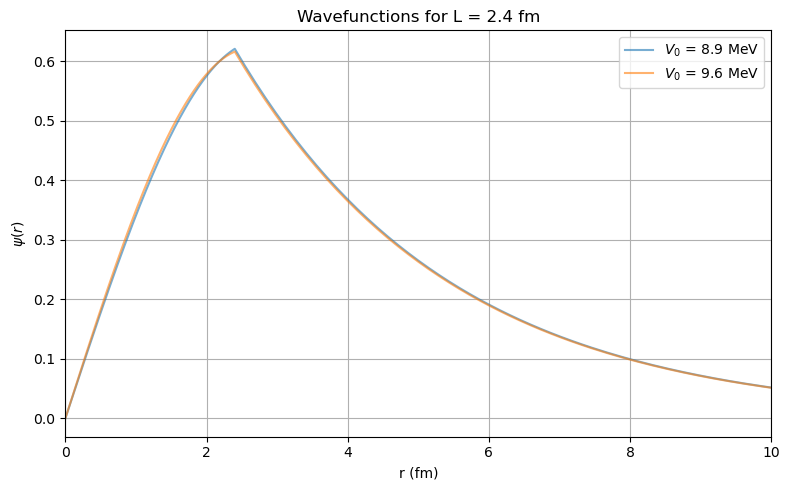

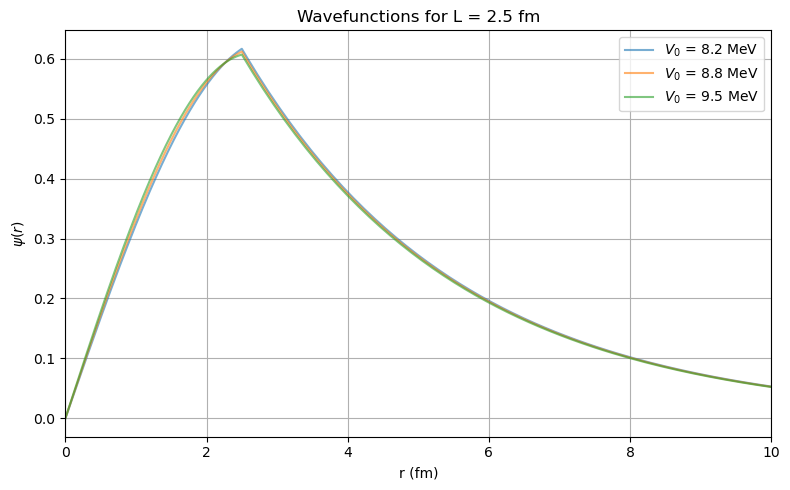

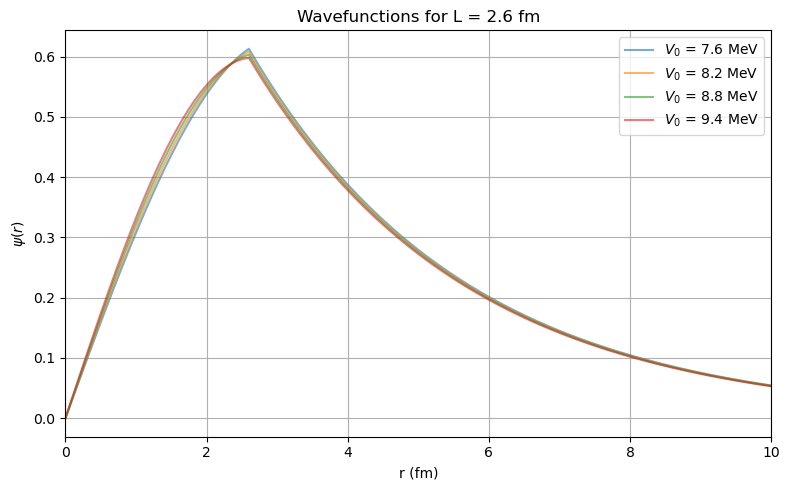

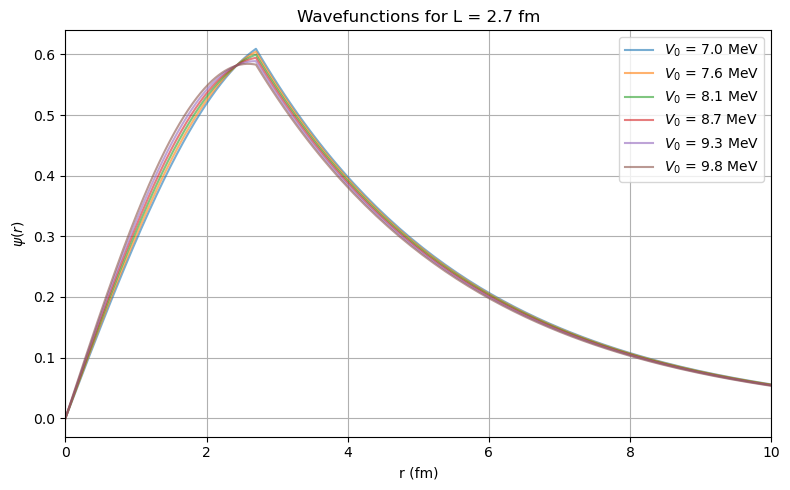

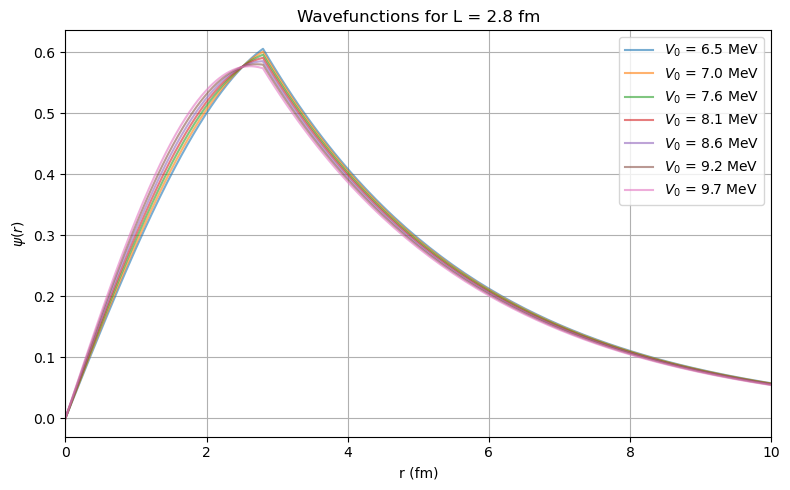

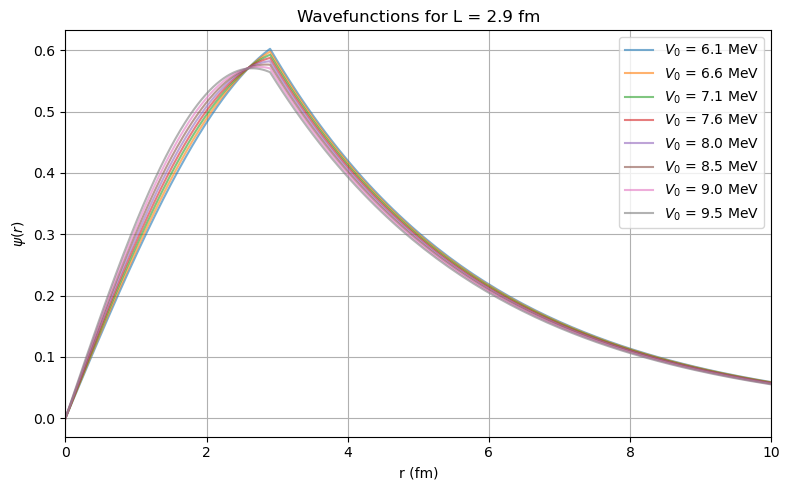

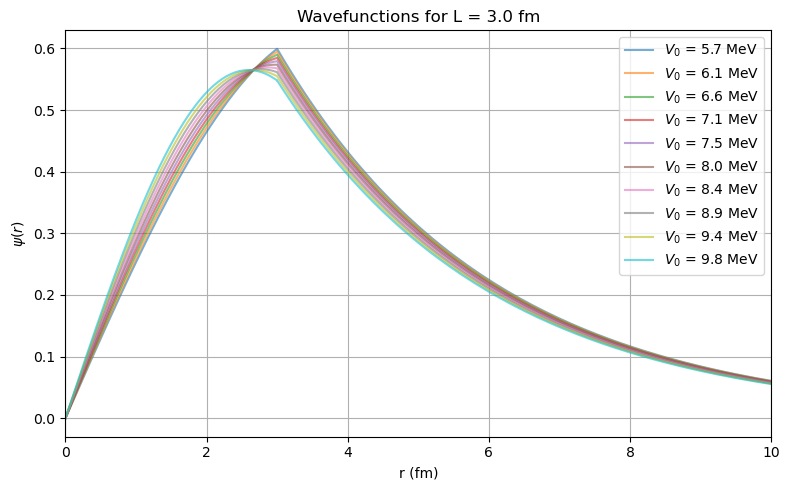

In [16]:
# Plot all available wavefunctions for each L value
for L_value, group in df_filtered.groupby('L'):
    plt.figure(figsize=(8, 5))

    # Access each row of the data frame
    for _, row in group.iterrows():
        
        # Access needed row values
        V_0 = row['V_0']
        E = row['|E|']
        L = row['L']
        A = row['A']
        B = row['B']

        # Calculate k and gamma
        k = cal_k(V_0, E)
        gamma = cal_gamma(E)
        
        # Range r
        r1 = np.linspace(0, L, 300) 
        r2 = np.linspace(L, 10*L, 300)

        # Wavefunction pieces
        psi1 = A * np.sin(k * r1)
        psi2 = B * np.exp(-gamma * r2)

        # Compine the two pieces
        r = np.concatenate((r1, r2))
        psi = np.concatenate((psi1, psi2))

        # Plot 
        plt.plot(r, psi, alpha=0.6, label=rf'$V_0$ = {V_0:.1f} MeV')

    # Labels
    plt.xlim(0, 10)
    plt.title(f'Wavefunctions for L = {L_value:.1f} fm')
    plt.xlabel('r (fm)')
    plt.ylabel(r'$\psi(r)$')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()